<a href="https://colab.research.google.com/github/LuanPCunha/TCC/blob/main/ProduzGraficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [95]:
!pip install 'matplotlib==3.5.2'
!pip install mlxtend

ERROR: Invalid requirement: "'matplotlib==3.5.2'"


In [96]:
import json
import sklearn
import pandas as pd
import mlxtend
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from itertools import cycle
import regex as re
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Funções

In [97]:
# Plot de Gráficos

def plot_accuracy(history, rede, algoritmo, otimizador):
    plt.figure(figsize=(6, 4), dpi=100)
    _,accuracy,loss,val_accuracy,val_loss = list(history.keys())
    acc = list(history[accuracy].values())
    test_acc = list(history[val_accuracy].values())
    epochs = range(len(acc))
    plt.plot(epochs, acc)
    plt.plot(epochs, test_acc)
    plt.legend(['train', 'test'], loc='upper left')
    plt.title('Gráfico de acurácia da rede '+ rede + ' com o algoritmo '+ algoritmo + ' e o otimizador '+ otimizador +'.') 
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.savefig('Acurácia_' + rede + '_' + algoritmo + '_' + otimizador +'.png', bbox_inches='tight', dpi=100)
    plt.show()

In [98]:
def plot_loss(history, rede, algoritmo, otimizador):
    plt.figure(figsize=(6, 4), dpi=100)
    _,accuracy,loss,val_accuracy,val_loss = list(history.keys())
    loss = list(history[loss].values())
    val_loss = list(history[val_loss].values())
    epochs = range(len(loss))
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.legend(['train', 'test'], loc="lower left")
    plt.title('Gráfico de perda da rede '+ rede + ' com o algoritmo '+ algoritmo + ' e o otimizador '+ otimizador +'.') 
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.savefig('Perda' + rede + '_' + algoritmo + '_' + otimizador +'.png', bbox_inches='tight', dpi=100)
    plt.show()

In [99]:
def plot_roc_curve(roc_curves):        
    fig = plt.figure(figsize=(8, 6), dpi=100)
    # colors = ["red", "blue", "magenta" , "darkorange" ,"aqua"]
    colors = ["red", "blue", "limegreen" , "darkorange" ,"royalblue"]
    color1 = 'blue'
    for roc_curve in roc_curves:

      false_positive_rate, true_positive_rate, score = list(roc_curve[0].keys())
      false_positive_rate = roc_curve[0][false_positive_rate]
      true_positive_rate = roc_curve[0][true_positive_rate]
      score = roc_curve[0][score]
    
      if roc_curve[4] == 'BILSTM':
        color1 = colors[0]
      if roc_curve[4] == 'CNN':
        color1 = colors[1]  
      if roc_curve[4] == 'GRU':
        color1 = colors[2]
      if roc_curve[4] == 'LSTM':
        color1 = colors[3]
      
      plt.plot(false_positive_rate, true_positive_rate, color=color1, label="{0} {1} {2} (AUC = {3:0.2f})".format(roc_curve[1], roc_curve[2], roc_curve[4], score))
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.0])
    plt.xlabel("Taxa de Falso Positivo")
    plt.ylabel("Taxa de Verdadeiro Positivo")
    plt.title('Curva ROC das redes com melhor desempenho.')
    plt.legend(loc="lower right")
    plt.savefig('Roc_Curve_Melhores_Resultados_Todas_As_Curvas.png', bbox_inches='tight', dpi=100)
    plt.show()

In [100]:
def plot_confusion(confusion_matrix, rede, algoritmo, otimizador):
  fig,ax = plot_confusion_matrix(figsize=(8, 6),
                                  conf_mat=confusion_matrix,
                                  colorbar=True,
                                  show_absolute=True,
                                  show_normed=True,
                                )
  plt.title('Matriz de Confusão da rede '+ rede + ' com o algoritmo '+ algoritmo + ' e o otimizador '+ otimizador +'.') 
  plt.savefig('Confusion_' + rede + '_' + algoritmo + '_' + otimizador +'.png', bbox_inches='tight', dpi=100)
  plt.show() 

In [101]:
def plot_acuracia_barras(train_resume):     #   [train_resume, rede, otimizador, base, acuracia] 

  colors = ["red", "blue", "limegreen" , "darkorange" ,"royalblue"]

  b0_auc_tuple = []
  b1_auc_tuple = []
  b2_auc_tuple = []
  b3_auc_tuple = []
  redes = []

  for resume in train_resume:
    redes.append((resume[1],resume[5]))

    ACC = int(resume[4]*100)
  
    if resume[5] == "BILSTM":
      b0_auc_tuple.append(ACC)  # ACC por base referente a rede 0. Cada posição nesta Tupla é uma rede. Ex: posição 0 da tupla é a Bi-LSTM.
      
     
    if resume[5] == "CNN":
      print(resume[1])
      b1_auc_tuple.append(ACC)

    if resume[5] == "GRU":
      b2_auc_tuple.append(ACC)

    if resume[5] == "LSTM":
      b3_auc_tuple.append(ACC)

  print(redes)
  redes.sort(key=lambda x: x[1])
  print(redes)
  rede = [x[0] for x in redes]
  print(rede)
  index = np.arange(len(rede))
  width = 0.25
  opacity = 1

  fig, ax = plt.subplots()
  fig.patch.set_facecolor('#eceff1')

  e = np.arange(len(b0_auc_tuple)+len(b1_auc_tuple)+len(b2_auc_tuple)+len(b3_auc_tuple))

  br0 = e[0:len(b0_auc_tuple)]
  br1 = e[len(br0):len(br0)+len(b1_auc_tuple)]
  br2 = e[len(br0)+len(br1):len(br0)+len(br1)+len(b2_auc_tuple)]
  br3 = e[len(br0)+len(br1)+len(br2):len(br0)+len(br1)+len(br2)+len(b3_auc_tuple)]

  print(br0, br1, br2, br3)

  base0 = ax.bar(br0, b0_auc_tuple, width, color=colors[0], alpha=opacity, label='BILSTM')
  base1 = ax.bar(br1, b1_auc_tuple, width, color=colors[1], alpha=opacity, label='CNN')
  base2 = ax.bar(br2, b2_auc_tuple, width, color=colors[2], alpha=opacity, label='GRU')
  base3 = ax.bar(br3, b3_auc_tuple, width, color=colors[3], alpha=opacity, label='LSTM')

  ax.set_facecolor('#eceff1')
  ax.set_ylabel('Acurácia (%)')
  ax.set_xlabel('Redes')
  ax.set_title('Acurácia por Algoritmo')
  ax.set_xticks(index, rede)
  ax.legend(loc='upper right')

  ax.bar_label(base0, padding=2.6)
  ax.bar_label(base1, padding=2.6)
  ax.bar_label(base2, padding=2.6)
  ax.bar_label(base3, padding=2.6)

  fig.tight_layout()
  plt.ylim([50, 109])
  plt.savefig('Acuracia_barras_por_Rede_e_Base.png', bbox_inches='tight', dpi=100)
  plt.show()

# Carrega arquivo de saída (resultados)

In [102]:
# Caminho arquivo de saída
PATH_ARQ_SAIDA = "../resultados.csv"

resultados = pd.read_csv(PATH_ARQ_SAIDA, index_col=False)
resultados.head()

,NOME_REDE,NOME_BASE,NOME_OTIMIZADOR,NOME_ALGORITMO,ACURACIA,LOSS,LEARNING_RATE,DROPOUT_RATE,BATCH,ROC_CURVE,TRAIN_RESUME,CONFUSION_MATRIX,EPOCHS,RANK
0,V2,PADRAO,Adam,CNN,0.962053,0.189754,0.001,0.2,128.0,"{""false_positive_rate"": [0.0, 0.00073358601296...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7976, ""01"": 203, ""10"": 157, ""11"": 1151}",12.0,5.069996
1,V3,PADRAO,Adam,LSTM,0.862127,0.401365,0.010,0.4,128.0,"{""false_positive_rate"": [0.0, 0.00012226433549...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8179, ""01"": 0, ""10"": 1308, ""11"": 0}",10.0,2.147988
2,V4,PADRAO,RMSprop,LSTM,0.862127,0.401229,0.001,0.0,128.0,"{""false_positive_rate"": [0.0, 0.00012226433549...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8179, ""01"": 0, ""10"": 1308, ""11"": 0}",20.0,2.148718
3,V5,PADRAO,RMSprop,LSTM,0.862127,0.401181,0.010,0.4,128.0,"{""false_positive_rate"": [0.0, 0.00012226433549...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8179, ""01"": 0, ""10"": 1308, ""11"": 0}",20.0,2.148971
4,V6,PADRAO,RMSprop,BILSTM,0.918520,26404.150391,0.010,0.4,128.0,"{""false_positive_rate"": [0.0, 0.00220075803888...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7956, ""01"": 223, ""10"": 550, ""11"": 758}",20.0,0.000035


# Tabela 1 - Todas Iterações (apendice)

In [103]:
resultados.keys()

Index(['NOME_REDE', 'NOME_BASE', 'NOME_OTIMIZADOR', 'NOME_ALGORITMO',
       'ACURACIA', 'LOSS', 'LEARNING_RATE', 'DROPOUT_RATE', 'BATCH',
       'ROC_CURVE', 'TRAIN_RESUME', 'CONFUSION_MATRIX', 'EPOCHS', 'RANK'],
      dtype='object')

In [104]:
Tabela1  = resultados.drop(['ROC_CURVE', 'TRAIN_RESUME','CONFUSION_MATRIX'], axis='columns')
Tabela1

,NOME_REDE,NOME_BASE,NOME_OTIMIZADOR,NOME_ALGORITMO,ACURACIA,LOSS,LEARNING_RATE,DROPOUT_RATE,BATCH,EPOCHS,RANK
0,V2,PADRAO,Adam,CNN,0.962053,0.189754,0.001,0.20,128.0,12.0,5.069996
1,V3,PADRAO,Adam,LSTM,0.862127,0.401365,0.010,0.40,128.0,10.0,2.147988
2,V4,PADRAO,RMSprop,LSTM,0.862127,0.401229,0.001,0.00,128.0,20.0,2.148718
3,V5,PADRAO,RMSprop,LSTM,0.862127,0.401181,0.010,0.40,128.0,20.0,2.148971
4,V6,PADRAO,RMSprop,BILSTM,0.918520,26404.150391,0.010,0.40,128.0,20.0,0.000035
5,V7,PADRAO,RMSprop,BILSTM,0.959102,0.184552,0.010,0.40,128.0,20.0,5.196934
6,V8,PADRAO,RMSprop,BILSTM,0.959945,0.231944,0.001,0.20,32.0,14.0,4.138694
7,V9,PADRAO,Adam,BILSTM,0.946769,0.163861,0.001,0.00,64.0,30.0,5.777888
8,V10,PADRAO,Adam,BILSTM,0.952567,0.469178,0.010,0.10,64.0,9.0,2.030287
9,V11,PADRAO,RMSProp,BILSTM,0.954675,0.347312,0.010,0.00,64.0,13.0,2.748755


# Tabela 2 - Melhores resultados por Rede (Resultados/conclusão)

In [105]:
Tabela2 = resultados.drop(['CONFUSION_MATRIX', 'TRAIN_RESUME','CONFUSION_MATRIX'], axis='columns')
Tabela2.sort_values(by=['ACURACIA', 'LOSS'], ascending=[False, True], inplace = True)
Tabela2

,NOME_REDE,NOME_BASE,NOME_OTIMIZADOR,NOME_ALGORITMO,ACURACIA,LOSS,LEARNING_RATE,DROPOUT_RATE,BATCH,ROC_CURVE,EPOCHS,RANK
15,V17,PADRAO,Adam,GRU,0.964457,0.132071,0.010,0.10,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...",18.0,7.302548
12,V14,PADRAO,RMSProp,GRU,0.962159,0.136773,0.010,0.00,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0001...",10.0,7.034734
0,V2,PADRAO,Adam,CNN,0.962053,0.189754,0.001,0.20,128.0,"{""false_positive_rate"": [0.0, 0.00073358601296...",12.0,5.069996
14,V16,PADRAO,RMSProp,GRU,0.961526,0.150060,0.010,0.25,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0001...",15.0,6.407607
13,V15,PADRAO,RMSProp,GRU,0.960156,0.159128,0.010,0.40,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.000122264...",10.0,6.033868
6,V8,PADRAO,RMSprop,BILSTM,0.959945,0.231944,0.001,0.20,32.0,"{""false_positive_rate"": [0.0, 0.00061132167746...",14.0,4.138694
5,V7,PADRAO,RMSprop,BILSTM,0.959102,0.184552,0.010,0.40,128.0,"{""false_positive_rate"": [0.0, 0.00048905734197...",20.0,5.196934
9,V11,PADRAO,RMSProp,BILSTM,0.954675,0.347312,0.010,0.00,64.0,"{""false_positive_rate"": [0.0, 0.00085585034845...",13.0,2.748755
8,V10,PADRAO,Adam,BILSTM,0.952567,0.469178,0.010,0.10,64.0,"{""false_positive_rate"": [0.0, 0.00256755104536...",9.0,2.030287
11,V13,PADRAO,RMSProp,LSTM,0.951407,0.160656,0.001,0.40,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...",11.0,5.922021


# Tabela 3 - Medias das iterações por rede * base * otimizador (apendice)

In [106]:
Tabela3 = resultados.drop(['ROC_CURVE', 'TRAIN_RESUME','CONFUSION_MATRIX', 'LEARNING_RATE', 'DROPOUT_RATE', 'EPOCHS', 'RANK', 'BATCH'], axis='columns')

Tabela3.sort_values(by=['ACURACIA', 'LOSS'], ascending=[False, True], inplace = True)
Tabela3 = Tabela3.groupby(["NOME_REDE", "NOME_OTIMIZADOR"],  as_index=False)
Tabela3

# Grafico 1 - Melhores resultados das iterações por rede e base

In [107]:
Graficos1 = resultados.copy()
Graficos1.sort_values(by=['ACURACIA', 'LOSS'], ascending=[False, True], inplace = True)
Graficos1 = Graficos1.groupby(["NOME_REDE"],as_index=False).first()
Graficos1

,NOME_REDE,NOME_BASE,NOME_OTIMIZADOR,NOME_ALGORITMO,ACURACIA,LOSS,LEARNING_RATE,DROPOUT_RATE,BATCH,ROC_CURVE,TRAIN_RESUME,CONFUSION_MATRIX,EPOCHS,RANK
0,V10,PADRAO,Adam,BILSTM,0.952567,0.469178,0.010,0.10,64.0,"{""false_positive_rate"": [0.0, 0.00256755104536...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7959, ""01"": 220, ""10"": 230, ""11"": 1078}",9.0,2.030287
1,V11,PADRAO,RMSProp,BILSTM,0.954675,0.347312,0.010,0.00,64.0,"{""false_positive_rate"": [0.0, 0.00085585034845...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7955, ""01"": 224, ""10"": 206, ""11"": 1102}",13.0,2.748755
2,V12,PADRAO,RMSProp,LSTM,0.931801,0.211340,0.010,0.00,32.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7700, ""01"": 479, ""10"": 168, ""11"": 1140}",10.0,4.409024
3,V13,PADRAO,RMSProp,LSTM,0.951407,0.160656,0.001,0.40,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7842, ""01"": 343, ""10"": 118, ""11"": 1184}",11.0,5.922021
4,V14,PADRAO,RMSProp,GRU,0.962159,0.136773,0.010,0.00,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0001...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8036, ""01"": 143, ""10"": 216, ""11"": 1092}",10.0,7.034734
5,V15,PADRAO,RMSProp,GRU,0.960156,0.159128,0.010,0.40,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.000122264...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8061, ""01"": 118, ""10"": 260, ""11"": 1048}",10.0,6.033868
6,V16,PADRAO,RMSProp,GRU,0.961526,0.150060,0.010,0.25,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0001...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8021, ""01"": 158, ""10"": 207, ""11"": 1101}",15.0,6.407607
7,V17,PADRAO,Adam,GRU,0.964457,0.132071,0.010,0.10,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 6712, ""01"": 116, ""10"": 165, ""11"": 913}",18.0,7.302548
8,V2,PADRAO,Adam,CNN,0.962053,0.189754,0.001,0.20,128.0,"{""false_positive_rate"": [0.0, 0.00073358601296...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7976, ""01"": 203, ""10"": 157, ""11"": 1151}",12.0,5.069996
9,V3,PADRAO,Adam,LSTM,0.862127,0.401365,0.010,0.40,128.0,"{""false_positive_rate"": [0.0, 0.00012226433549...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8179, ""01"": 0, ""10"": 1308, ""11"": 0}",10.0,2.147988


In [108]:
Graficos1.size

224

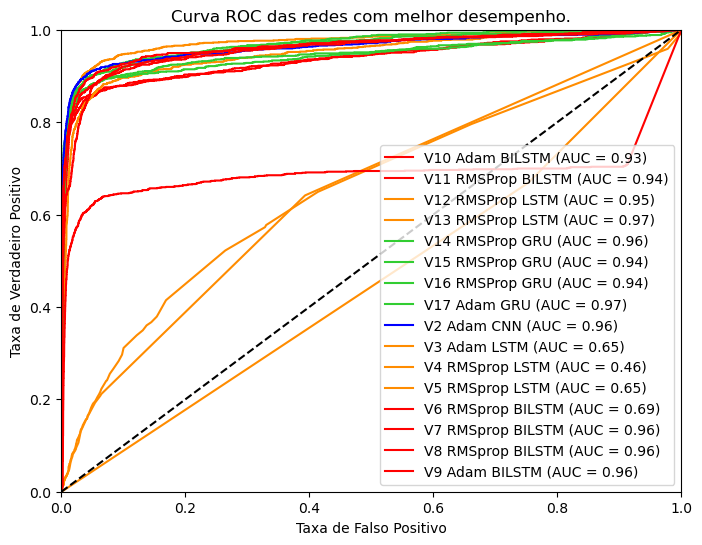

V2
[('V10', 'BILSTM'), ('V11', 'BILSTM'), ('V12', 'LSTM'), ('V13', 'LSTM'), ('V14', 'GRU'), ('V15', 'GRU'), ('V16', 'GRU'), ('V17', 'GRU'), ('V2', 'CNN'), ('V3', 'LSTM'), ('V4', 'LSTM'), ('V5', 'LSTM'), ('V6', 'BILSTM'), ('V7', 'BILSTM'), ('V8', 'BILSTM'), ('V9', 'BILSTM')]
[('V10', 'BILSTM'), ('V11', 'BILSTM'), ('V6', 'BILSTM'), ('V7', 'BILSTM'), ('V8', 'BILSTM'), ('V9', 'BILSTM'), ('V2', 'CNN'), ('V14', 'GRU'), ('V15', 'GRU'), ('V16', 'GRU'), ('V17', 'GRU'), ('V12', 'LSTM'), ('V13', 'LSTM'), ('V3', 'LSTM'), ('V4', 'LSTM'), ('V5', 'LSTM')]
['V10', 'V11', 'V6', 'V7', 'V8', 'V9', 'V2', 'V14', 'V15', 'V16', 'V17', 'V12', 'V13', 'V3', 'V4', 'V5']
[0 1 2 3 4 5] [6] [ 7  8  9 10] [11 12 13 14 15]


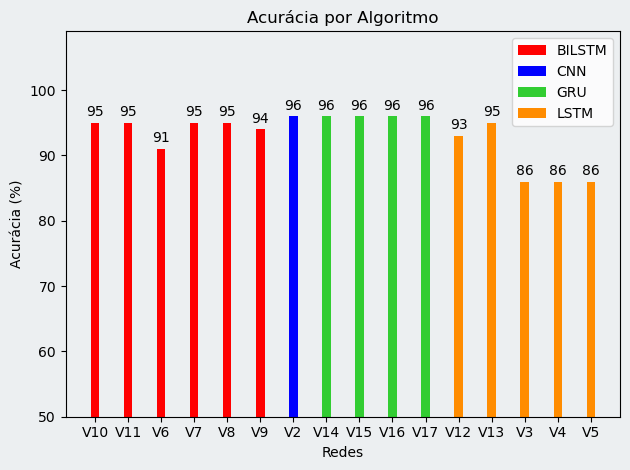

In [109]:
roc_list = []
train_list = []
for roc_curve, rede, otimizador, algoritmo, base, train_resume, acuracia in zip(Graficos1.ROC_CURVE, Graficos1.NOME_REDE, Graficos1.NOME_OTIMIZADOR, Graficos1.NOME_ALGORITMO, Graficos1.NOME_BASE, Graficos1.TRAIN_RESUME, Graficos1.ACURACIA):
  #print(roc_curve)
  roc_list.append([json.loads(roc_curve), rede, otimizador, base, algoritmo])
  
  train_list.append([train_resume, rede, otimizador, base, acuracia, algoritmo])

plot_roc_curve(roc_list)
#plot_roc_barras(roc_list)
plot_acuracia_barras(train_list)

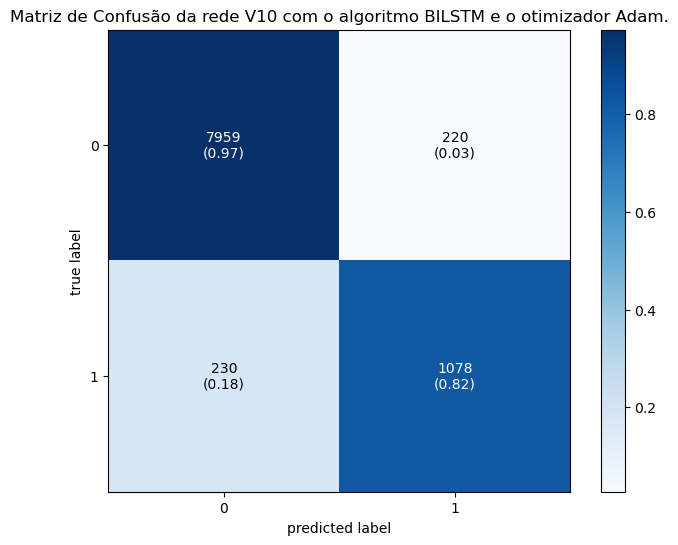

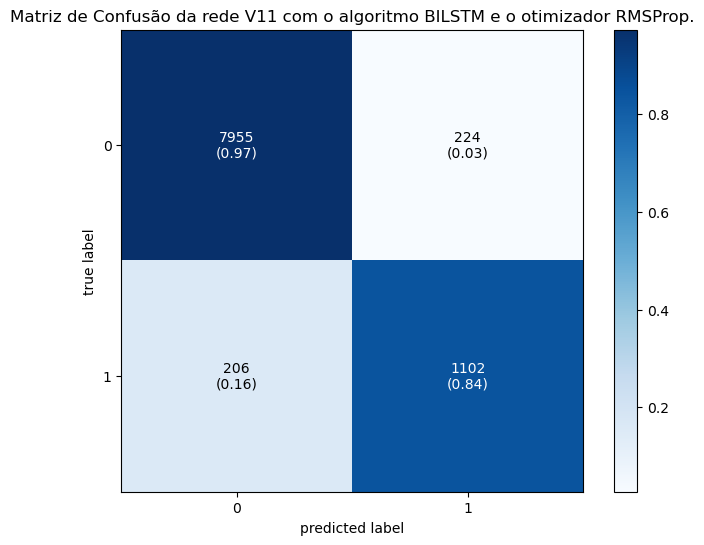

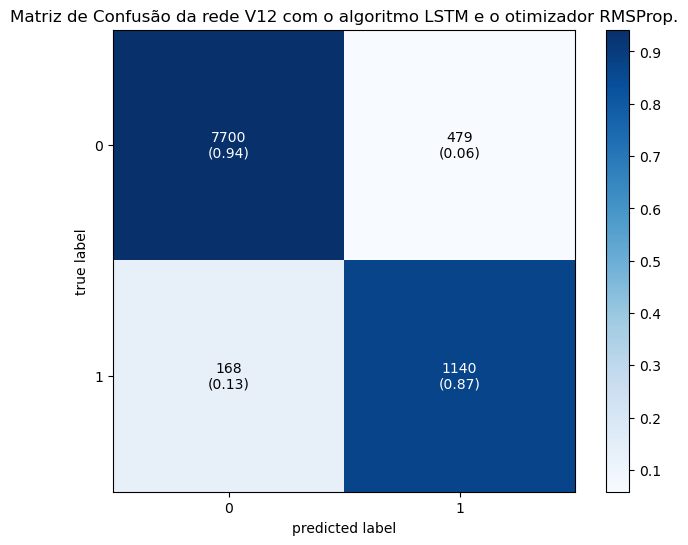

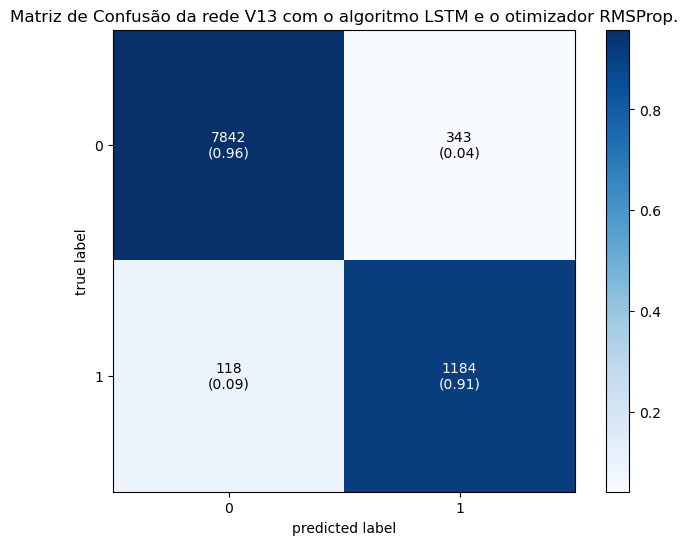

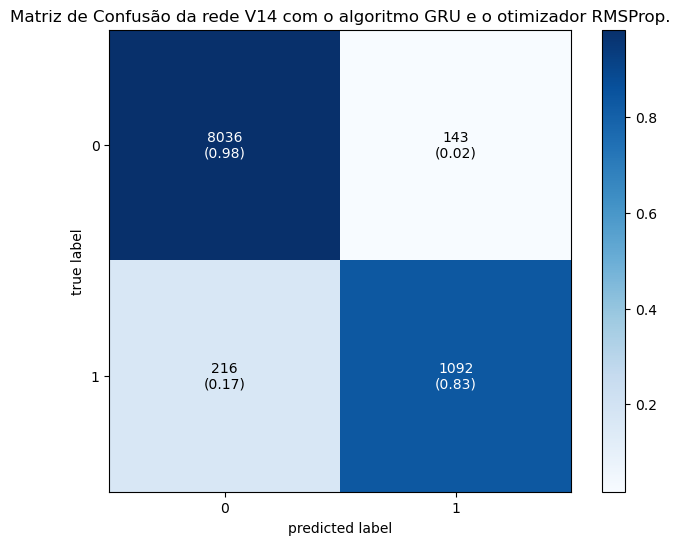

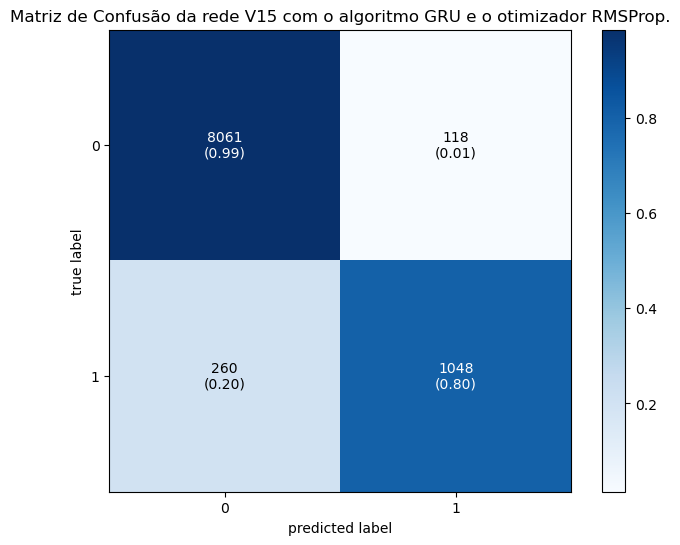

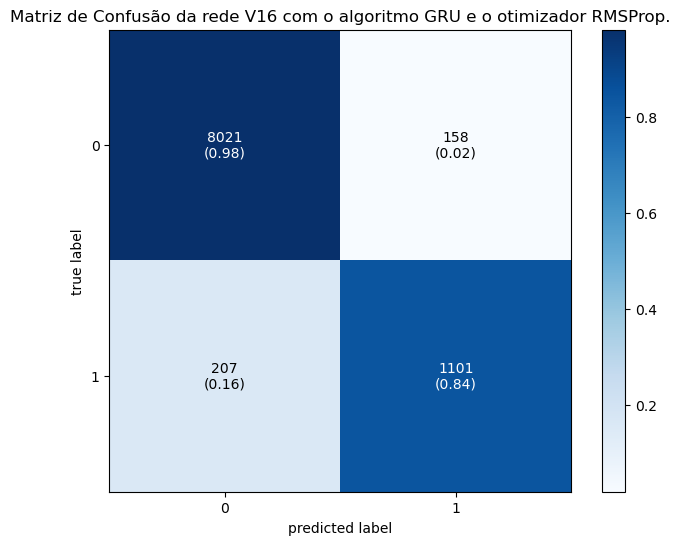

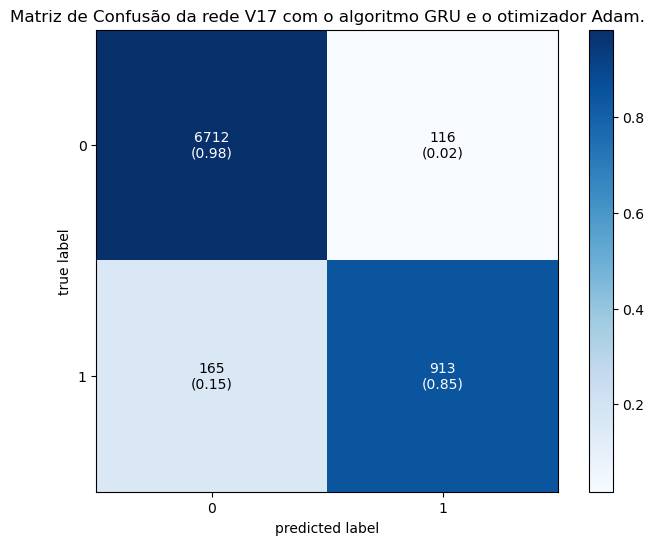

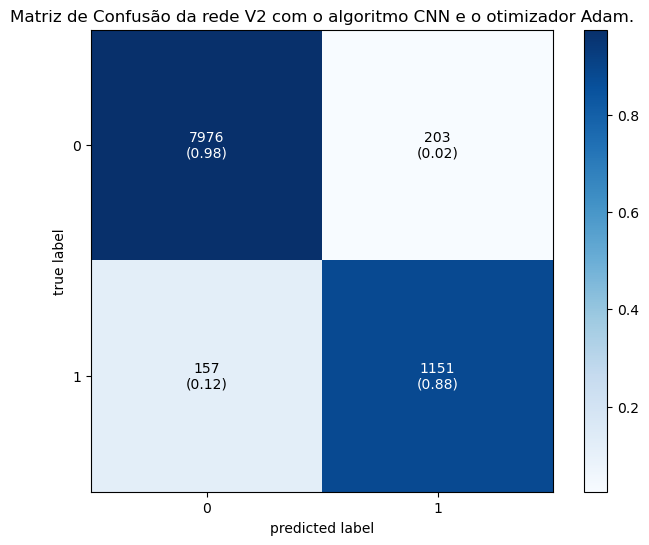

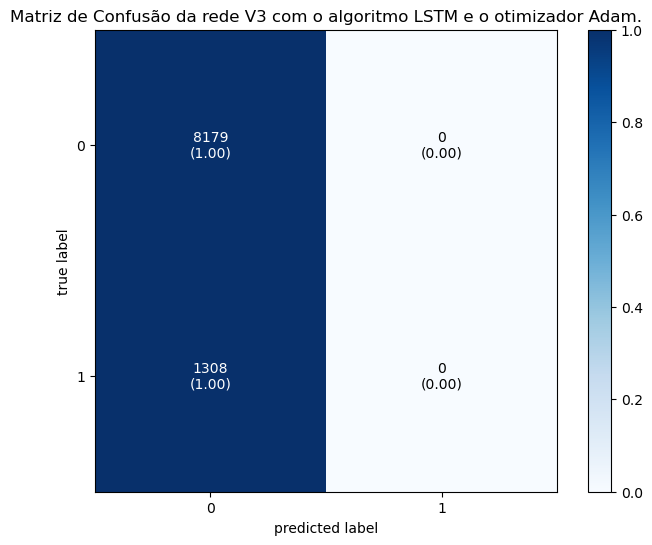

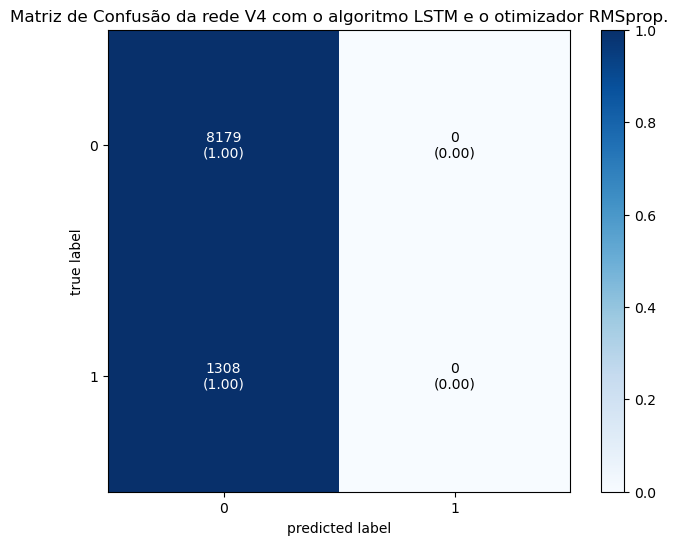

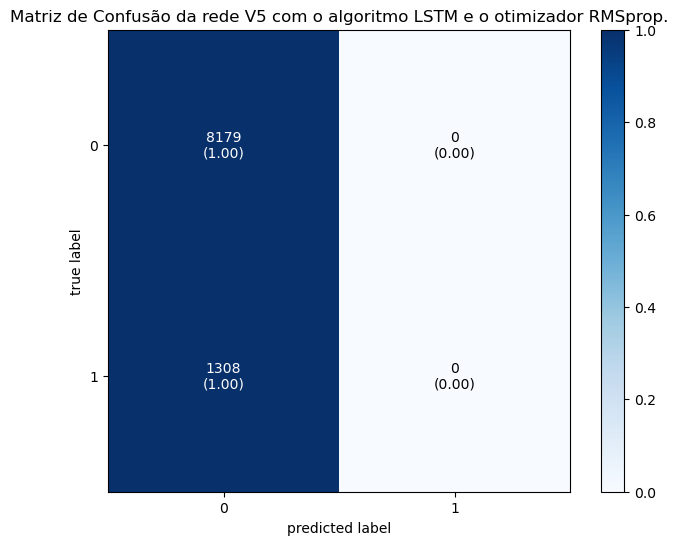

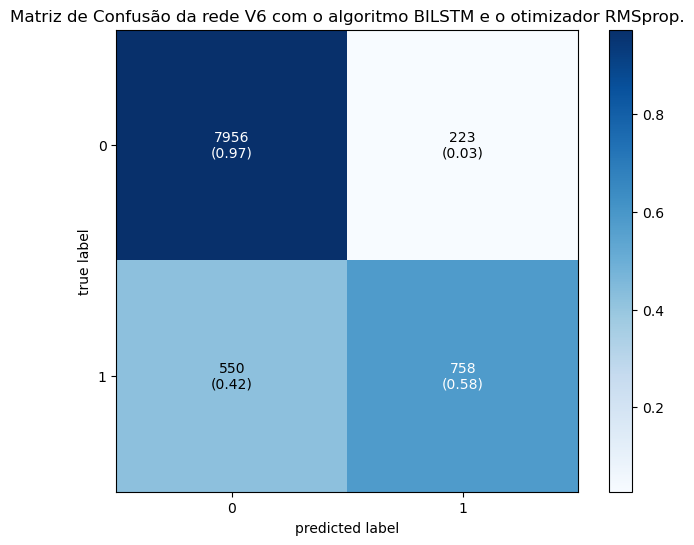

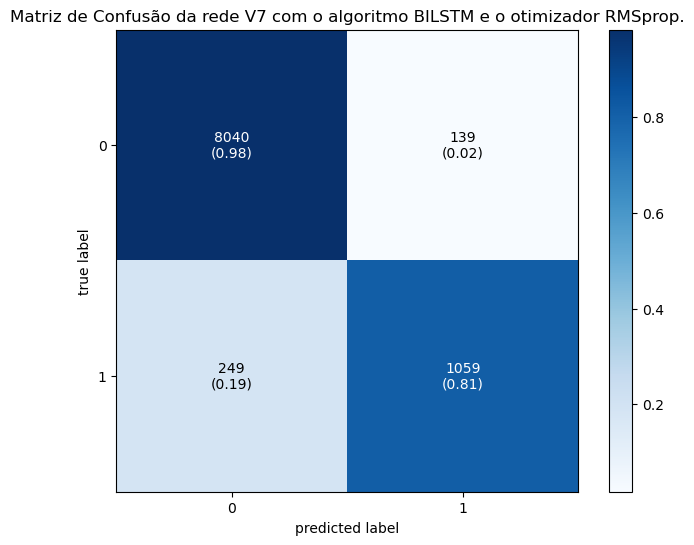

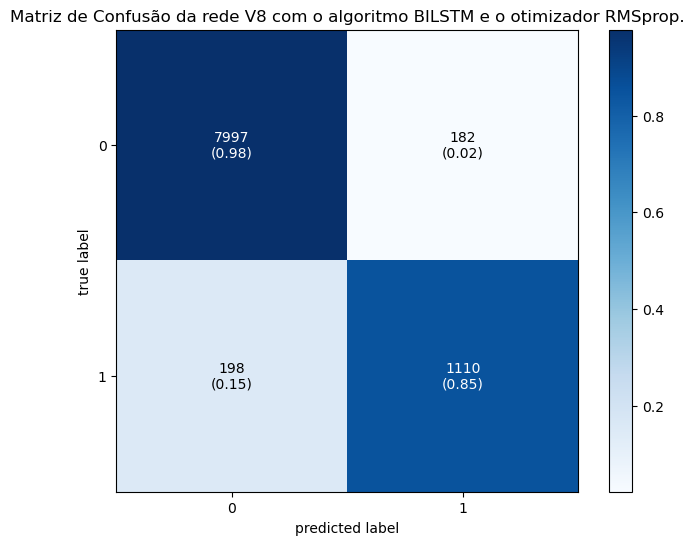

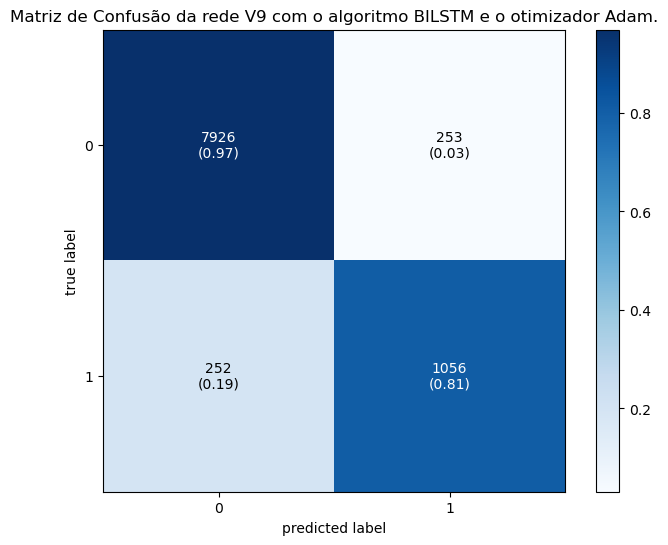

In [110]:
for confusion_matrix, rede, algoritmo, otimizador in zip(Graficos1.CONFUSION_MATRIX, Graficos1.NOME_REDE, Graficos1.NOME_ALGORITMO, Graficos1.NOME_OTIMIZADOR):
  confusion_matrix = json.loads(confusion_matrix)
  confusion_matrix = np.array([ [confusion_matrix["00"],confusion_matrix["01"]],
                                [confusion_matrix["10"],confusion_matrix["11"]] ])
  
  plot_confusion(confusion_matrix, rede, algoritmo, otimizador)

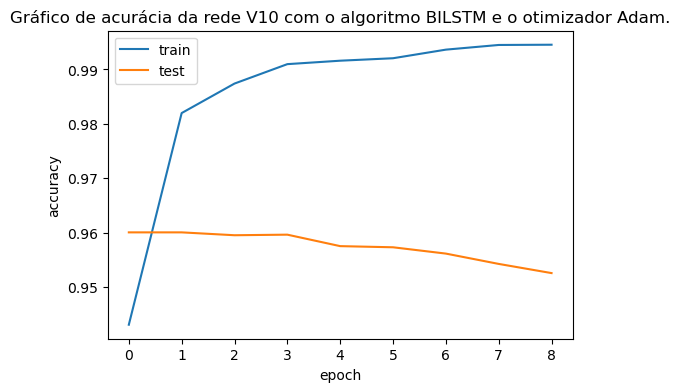

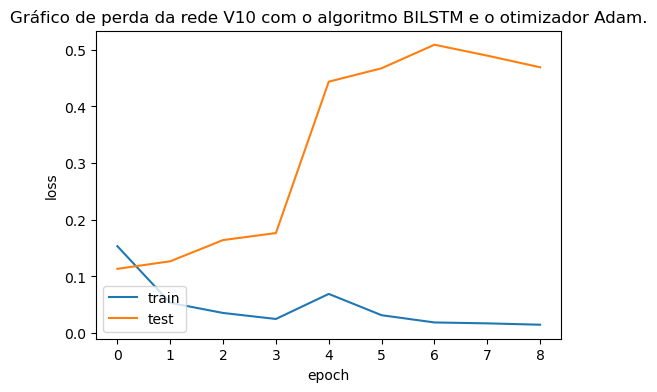

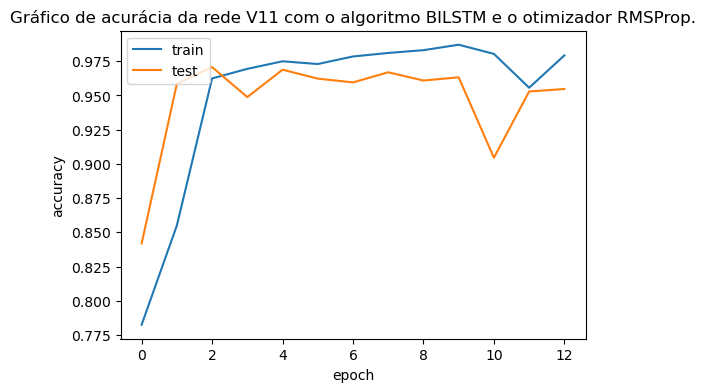

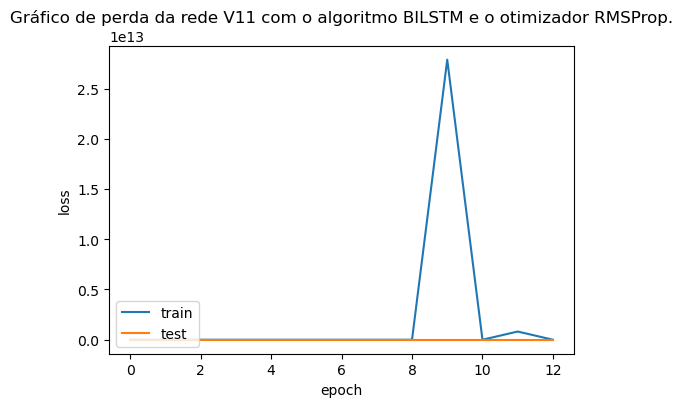

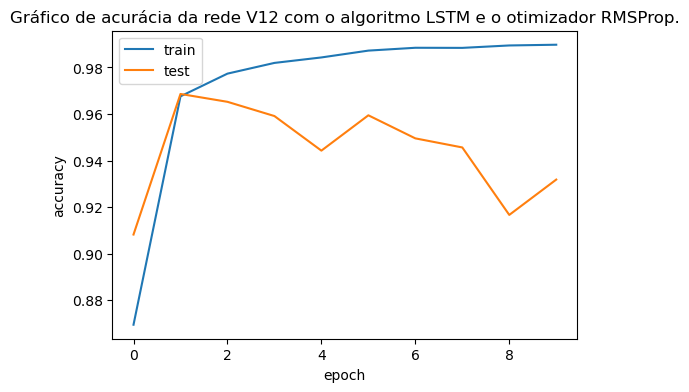

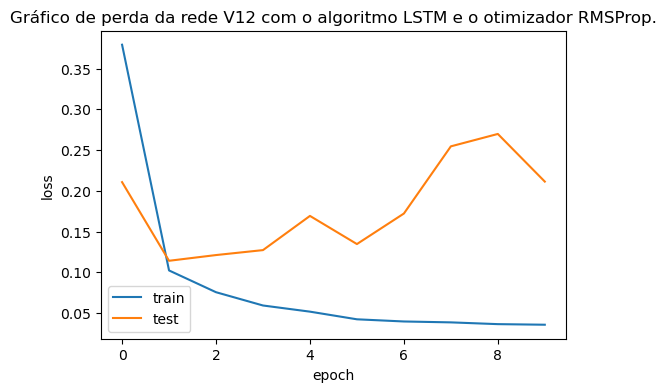

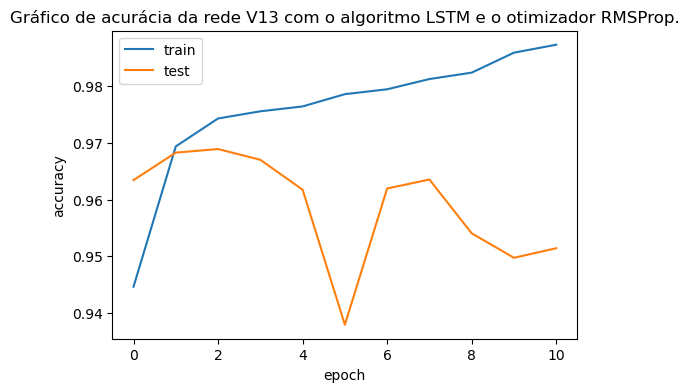

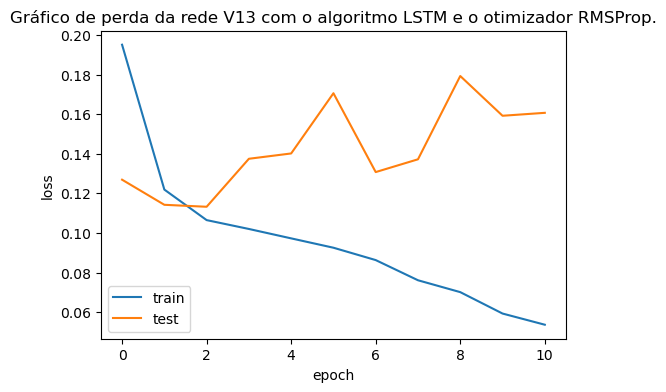

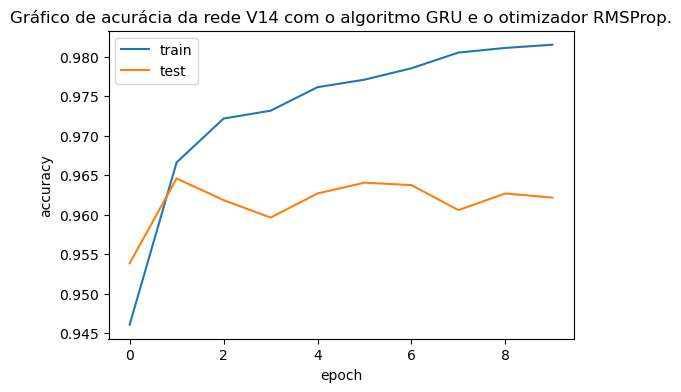

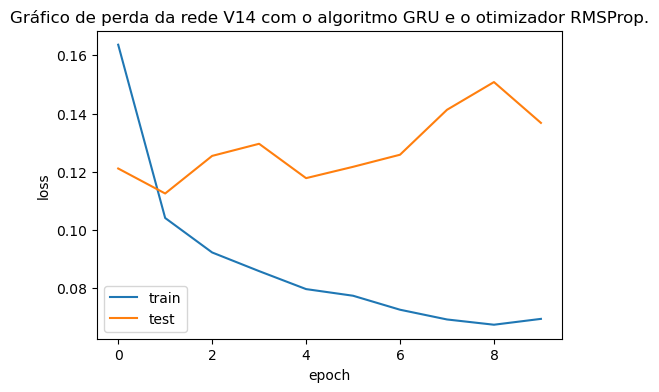

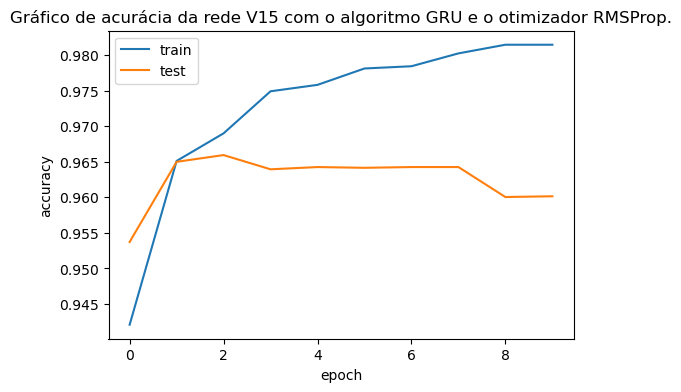

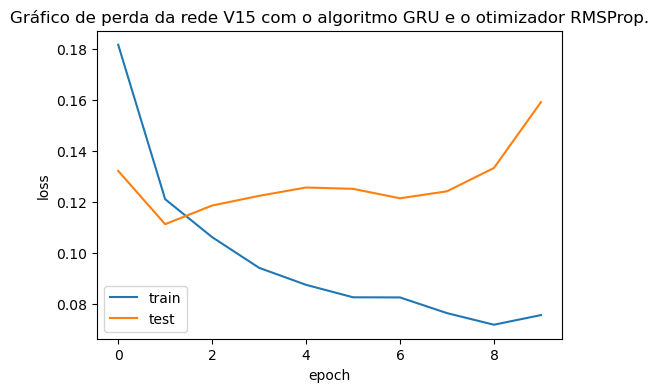

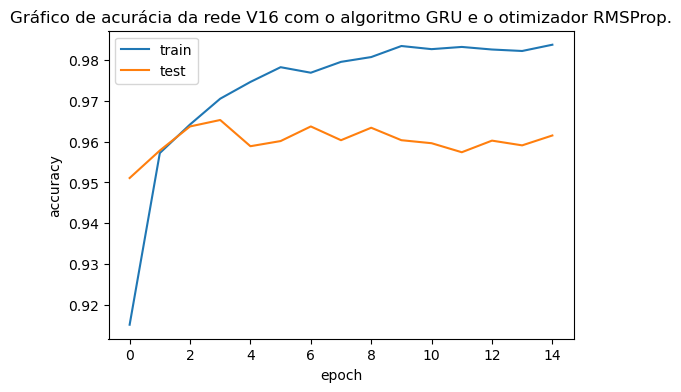

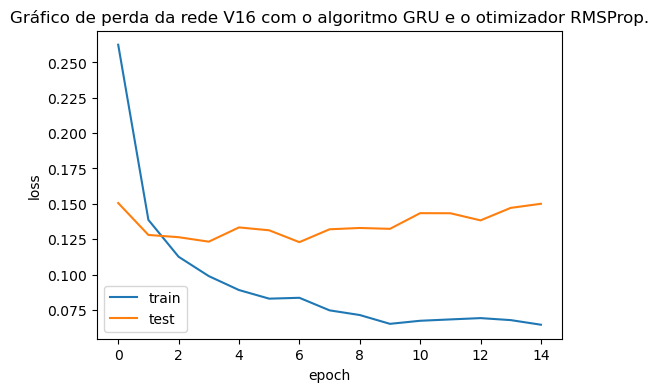

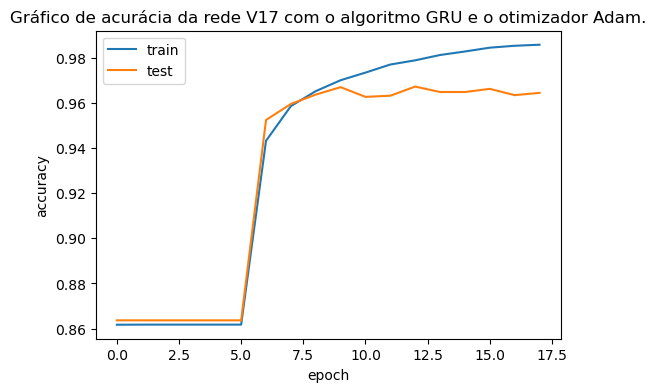

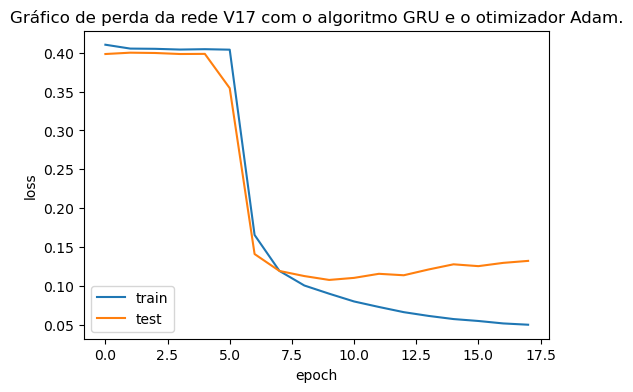

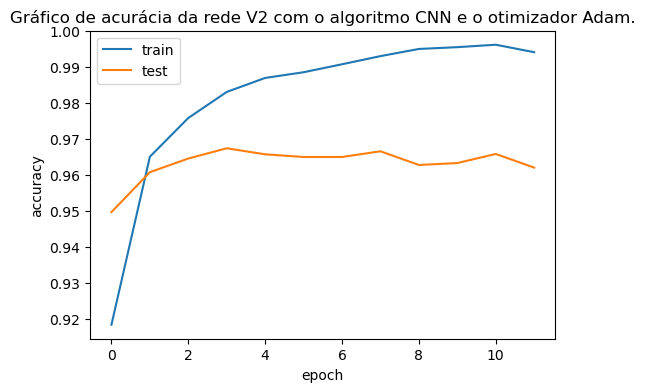

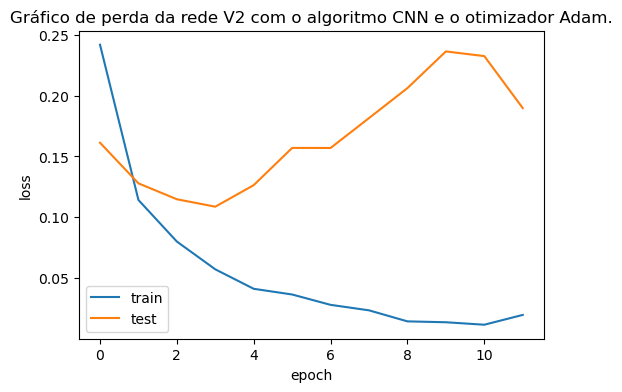

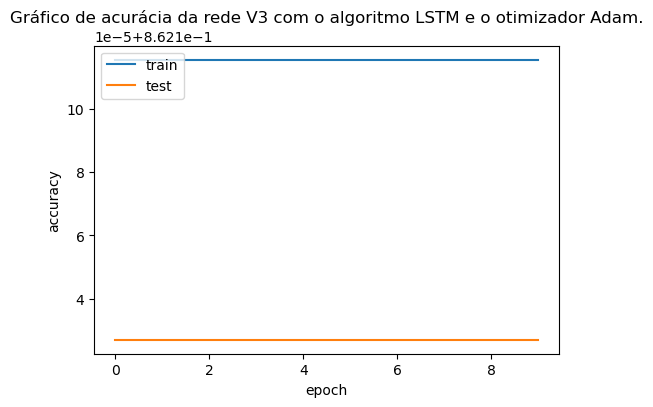

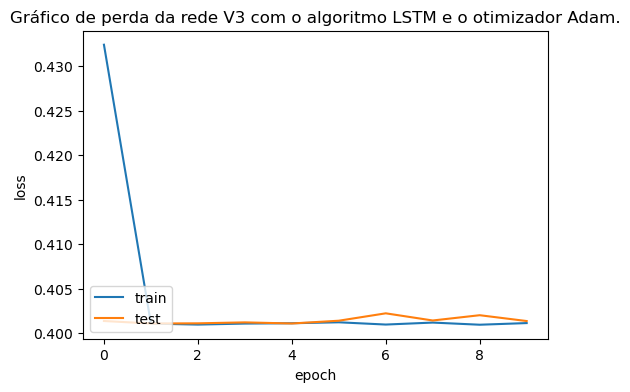

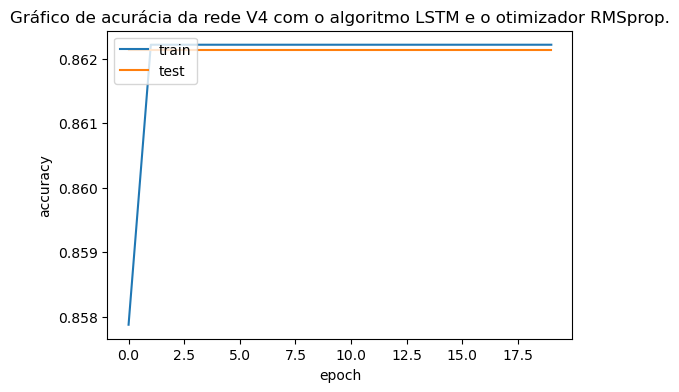

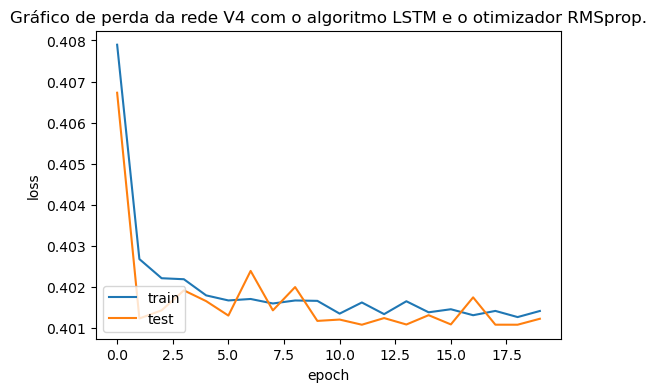

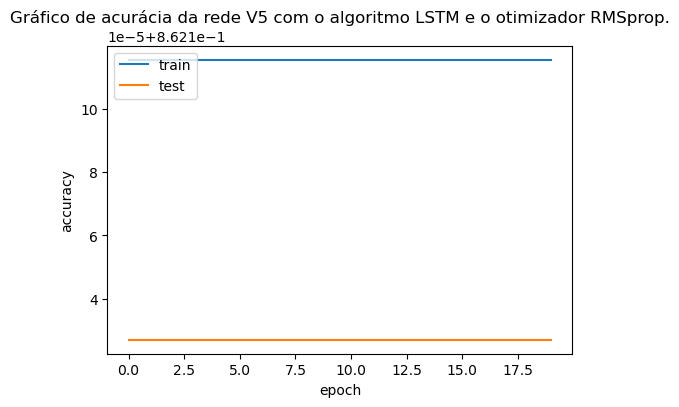

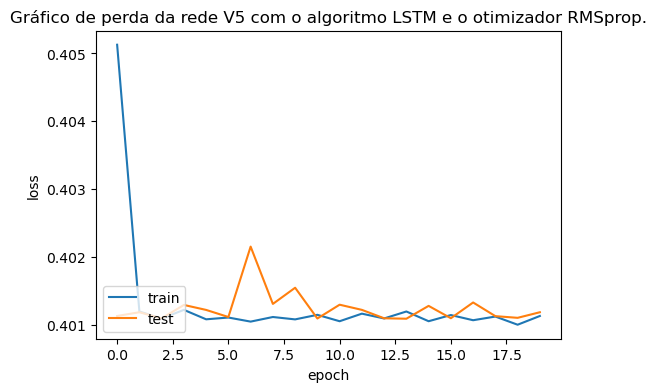

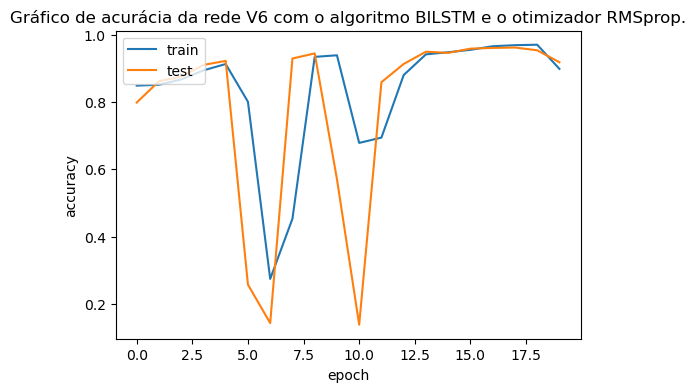

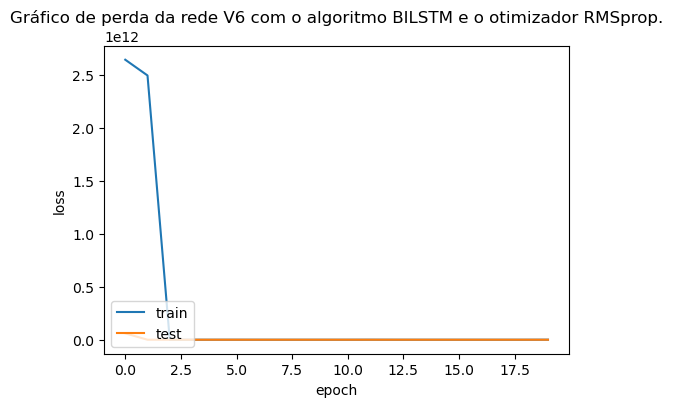

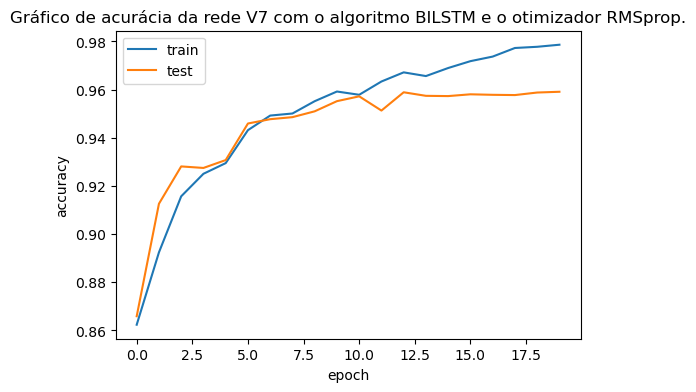

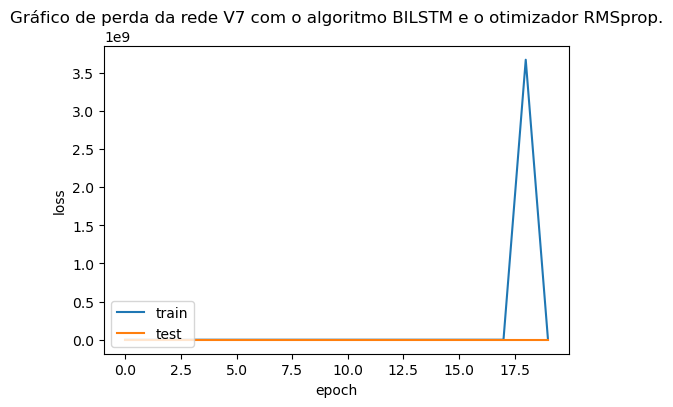

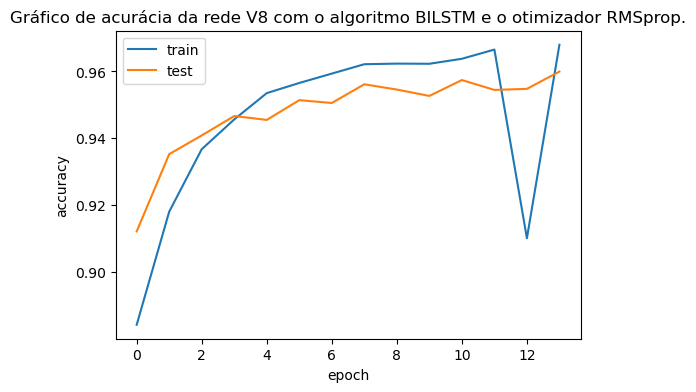

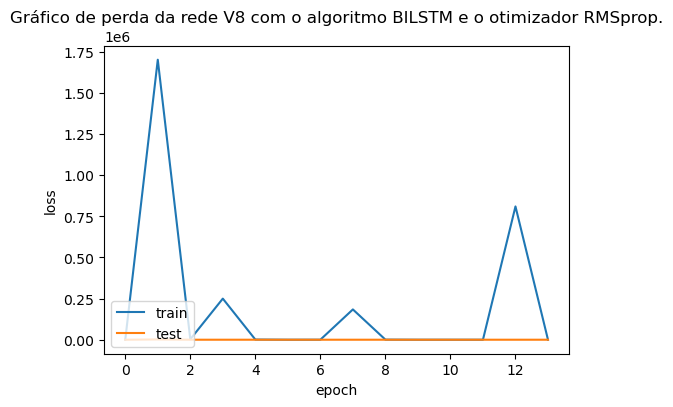

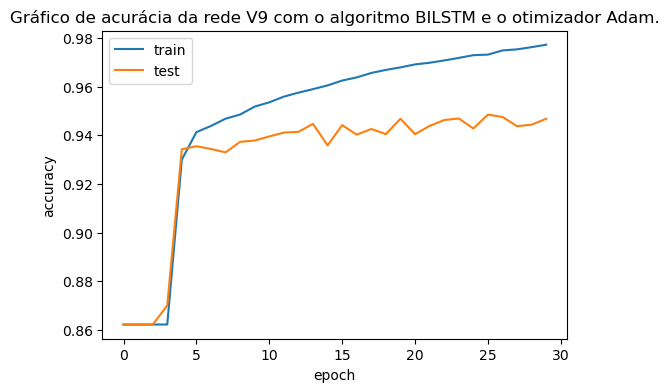

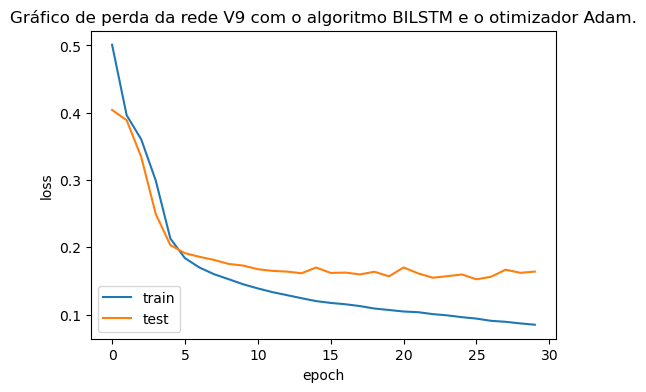

In [111]:
for train_resume, rede, algoritmo, otimizador  in zip(Graficos1.TRAIN_RESUME, Graficos1.NOME_REDE, Graficos1.NOME_ALGORITMO, Graficos1.NOME_OTIMIZADOR):
  plot_accuracy(json.loads(train_resume), rede, algoritmo, otimizador)
  plot_loss(json.loads(train_resume), rede, algoritmo, otimizador)

In [112]:
Graficos1

,NOME_REDE,NOME_BASE,NOME_OTIMIZADOR,NOME_ALGORITMO,ACURACIA,LOSS,LEARNING_RATE,DROPOUT_RATE,BATCH,ROC_CURVE,TRAIN_RESUME,CONFUSION_MATRIX,EPOCHS,RANK
0,V10,PADRAO,Adam,BILSTM,0.952567,0.469178,0.010,0.10,64.0,"{""false_positive_rate"": [0.0, 0.00256755104536...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7959, ""01"": 220, ""10"": 230, ""11"": 1078}",9.0,2.030287
1,V11,PADRAO,RMSProp,BILSTM,0.954675,0.347312,0.010,0.00,64.0,"{""false_positive_rate"": [0.0, 0.00085585034845...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7955, ""01"": 224, ""10"": 206, ""11"": 1102}",13.0,2.748755
2,V12,PADRAO,RMSProp,LSTM,0.931801,0.211340,0.010,0.00,32.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7700, ""01"": 479, ""10"": 168, ""11"": 1140}",10.0,4.409024
3,V13,PADRAO,RMSProp,LSTM,0.951407,0.160656,0.001,0.40,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7842, ""01"": 343, ""10"": 118, ""11"": 1184}",11.0,5.922021
4,V14,PADRAO,RMSProp,GRU,0.962159,0.136773,0.010,0.00,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0001...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8036, ""01"": 143, ""10"": 216, ""11"": 1092}",10.0,7.034734
5,V15,PADRAO,RMSProp,GRU,0.960156,0.159128,0.010,0.40,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.000122264...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8061, ""01"": 118, ""10"": 260, ""11"": 1048}",10.0,6.033868
6,V16,PADRAO,RMSProp,GRU,0.961526,0.150060,0.010,0.25,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0001...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8021, ""01"": 158, ""10"": 207, ""11"": 1101}",15.0,6.407607
7,V17,PADRAO,Adam,GRU,0.964457,0.132071,0.010,0.10,16.0,"{""false_positive_rate"": [0.0, 0.0, 0.0, 0.0, 0...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 6712, ""01"": 116, ""10"": 165, ""11"": 913}",18.0,7.302548
8,V2,PADRAO,Adam,CNN,0.962053,0.189754,0.001,0.20,128.0,"{""false_positive_rate"": [0.0, 0.00073358601296...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 7976, ""01"": 203, ""10"": 157, ""11"": 1151}",12.0,5.069996
9,V3,PADRAO,Adam,LSTM,0.862127,0.401365,0.010,0.40,128.0,"{""false_positive_rate"": [0.0, 0.00012226433549...","{""epoch"": {""0"": 0, ""1"": 1, ""2"": 2, ""3"": 3, ""4""...","{""00"": 8179, ""01"": 0, ""10"": 1308, ""11"": 0}",10.0,2.147988
